In [18]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.linear_model import SGDClassifier

import tensorflow as tf
from tensorflow import keras

from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

from sklearn.metrics import classification_report,confusion_matrix

In [19]:
# 1. 데이터 로딩 및 탐색

# 데이터 로드
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

# 데이터 형태 출력
print("Training data shape:", train_input.shape, train_target.shape)
print("Test data shape:", test_input.shape, test_target.shape)

Training data shape: (60000, 28, 28) (60000,)
Test data shape: (10000, 28, 28) (10000,)


In [20]:
train_input[:2]

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]]], dtype=uint8)

흑백 이미지 확인

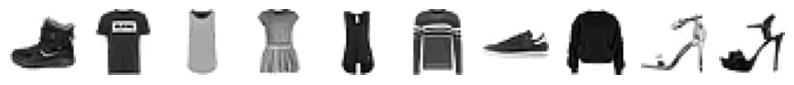

In [21]:
# 처음 10개의 이미지를 시각화
fig, axs = plt.subplots(1, 10, figsize=(10,10))
for i in range(10):
    axs[i].imshow(train_input[i], cmap='gray_r')
    axs[i].axis('off')
plt.show()

In [22]:
# 처음 10개의 타겟 레이블 출력
print("First 10 training labels:", [train_target[i] for i in range(10)])

First 10 training labels: [9, 0, 0, 3, 0, 2, 7, 2, 5, 5]


In [23]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

labels_and_names = [(label, class_names[label]) for label in train_target[:10]]
labels_and_names

[(9, 'Ankle boot'),
 (0, 'T-shirt/top'),
 (0, 'T-shirt/top'),
 (3, 'Dress'),
 (0, 'T-shirt/top'),
 (2, 'Pullover'),
 (7, 'Sneaker'),
 (2, 'Pullover'),
 (5, 'Sandal'),
 (5, 'Sandal')]

In [24]:
# 타겟 레이블의 고유한 값 및 각 레이블의 개수 출력
unique_targets, counts = np.unique(train_target, return_counts=True)
print("Unique target labels:", unique_targets)
print("Counts of each label:", counts)

Unique target labels: [0 1 2 3 4 5 6 7 8 9]
Counts of each label: [6000 6000 6000 6000 6000 6000 6000 6000 6000 6000]


In [25]:
train_scaled = train_input / 255.0
# train_scaled = train_scaled.reshape(-1, 28*28)  # flatten

In [26]:
train_scaled.shape

(60000, 28, 28)

In [27]:
train_target.shape

(60000,)

In [28]:
# 3. 모델 생성 및 컴파일

# 단순한 완전 연결 계층을 사용한 모델 생성
model = tf.keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)), # 입력 데이터를 1D로 변환 (flatten)
    keras.layers.Dense(10, activation='softmax')
])

In [29]:
# 모델 컴파일
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')

In [30]:
# 4. 모델 학습
history = model.fit(train_scaled, train_target, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.5852 - accuracy: 0.8019
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4667 - accuracy: 0.8411
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4443 - accuracy: 0.8495
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4328 - accuracy: 0.8533
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4272 - accuracy: 0.8554


In [31]:
model.evaluate(test_input, test_target)

313/313 [==============================] - 1s 2ms/step - loss: 87.5529 - accuracy: 0.8133


[87.55294799804688, 0.8133000135421753]

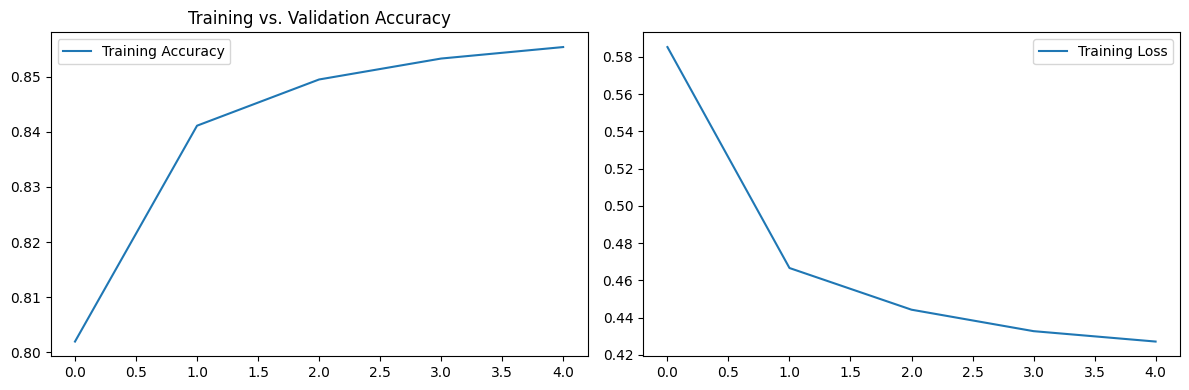

In [32]:
# 6. 결과 시각화

# 훈련 및 검증 정확도 시각화
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
# plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Training vs. Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
# plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
# plt.title('Training vs. Validation Loss')

plt.tight_layout()
plt.show()

---

2 Layers

In [33]:
# 데이터 정규화 및 1D로 변환
train_scaled = train_input / 255.0
train_scaled = train_scaled.reshape(-1, 28*28)

# 데이터를 훈련 세트와 검증 세트로 분할
train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2, random_state=42)

In [34]:
# 방법 1: Sequential API 사용하여 레이어 추가
# 모델 이름 변경: 공백을 제거하거나 밑줄(_)로 대체
model = keras.Sequential([
    keras.layers.Dense(100, activation='sigmoid', input_shape=(784,), name='hidden'),
    keras.layers.Dense(10, activation='softmax', name='output')
], name='Add_Model')  # 이름 변경

# 방법 2: 모델 초기화 후 add() 메서드를 사용하여 레이어 추가
# model = keras.Sequential()
# model.add(keras.layers.Dense(100, activation='sigmoid', input_shape=(784,)))
# model.add(keras.layers.Dense(10, activation='softmax'))

model.summary()

Model: "Add_Model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden (Dense)              (None, 100)               78500     
                                                                 
 output (Dense)              (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [35]:
# # 방법 3: Flatten 레이어를 추가하여 2D 입력을 1D로 변환
# from tensorflow import keras
# from sklearn.model_selection import train_test_split

# # 데이터 정규화 (1D로 변환하는 코드 제거)
# train_scaled = train_input / 255.0

# # 데이터를 훈련 세트와 검증 세트로 분할
# train_scaled, val_scaled, train_target, val_target = train_test_split(
#     train_scaled, train_target, test_size=0.2, random_state=42)

# model = keras.Sequential()
# model.add(keras.layers.Flatten(input_shape=(28, 28)))
# model.add(keras.layers.Dense(100, activation='relu'))
# model.add(keras.layers.Dense(10, activation='softmax'))

In [36]:
# 모델 컴파일
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')

# 모델 학습
model.fit(train_scaled, train_target, epochs=5)

Epoch 1/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.5847 - accuracy: 0.8052
Epoch 2/5
1500/1500 [==============================] - 6s 4ms/step - loss: 0.4095 - accuracy: 0.8540
Epoch 3/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3724 - accuracy: 0.8660
Epoch 4/5
1500/1500 [==============================] - 7s 5ms/step - loss: 0.3469 - accuracy: 0.8741
Epoch 5/5
1500/1500 [==============================] - 5s 4ms/step - loss: 0.3280 - accuracy: 0.8822


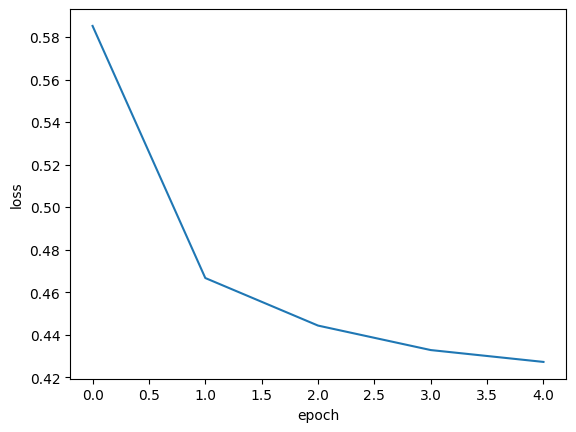

In [37]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

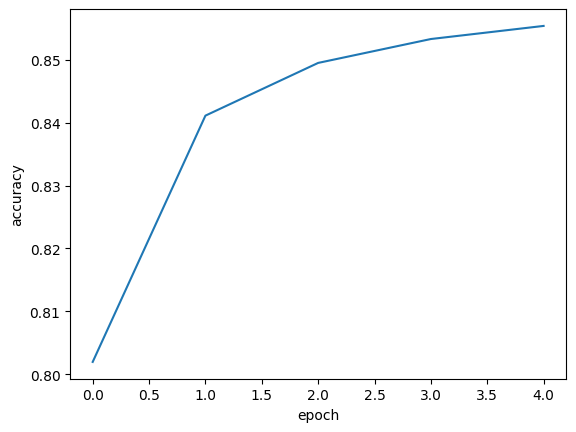

In [38]:
plt.plot(history.history['accuracy'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

---

Dropout

In [39]:
# 드롭아웃 레이어를 포함한 모델 정의
dropout_model = keras.Sequential([
    keras.layers.Dense(100, activation='sigmoid', input_shape=(784,), name='hidden'),
    keras.layers.Dropout(0.5),  # 50%의 뉴런을 무작위로 비활성화
    keras.layers.Dense(10, activation='softmax', name='output')
], name='Dropout_Model')

# 모델 요약
dropout_model.summary()

# 모델 컴파일
dropout_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')

# 모델 학습
history = dropout_model.fit(train_scaled, train_target, epochs=5, validation_data=(val_scaled, val_target))

Model: "Dropout_Model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden (Dense)              (None, 100)               78500     
                                                                 
 dropout_1 (Dropout)         (None, 100)               0         
                                                                 
 output (Dense)              (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
1500/1500 [==============================] - 8s 5ms/step - loss: 0.7373 - accuracy: 0.7449 - val_loss: 0.4787 - val_accuracy: 0.8251
Epoch 2/5
1500/1500 [==============================] - 7s 5ms/step - loss: 0.5085 - accuracy: 0.8177 - val_loss: 0.4256 - val_accuracy: 0.8462
Epoch 3/5
1500/1500 [======

In [40]:
# 원래 모델 평가
loss, accuracy = model.evaluate(val_scaled, val_target)
print("Original Model - Loss:", loss, "Accuracy:", accuracy)

# 드롭아웃 모델 평가
dropout_loss, dropout_accuracy = dropout_model.evaluate(val_scaled, val_target)
print("Dropout Model - Loss:", dropout_loss, "Accuracy:", dropout_accuracy)

375/375 [==============================] - 1s 2ms/step - loss: 0.3458 - accuracy: 0.8720
Original Model - Loss: 0.34580159187316895 Accuracy: 0.871999979019165
375/375 [==============================] - 1s 2ms/step - loss: 0.3746 - accuracy: 0.8612
Dropout Model - Loss: 0.37456628680229187 Accuracy: 0.8612499833106995


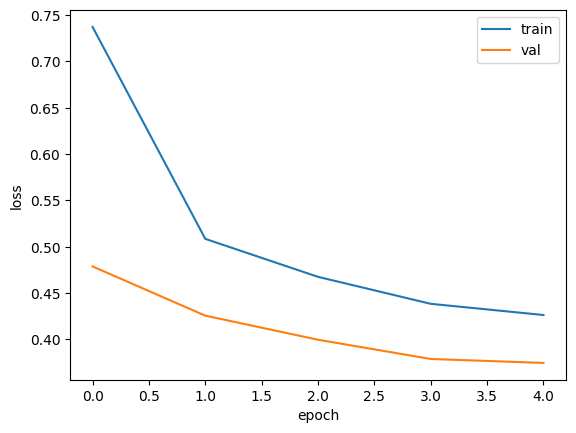

In [41]:
import matplotlib.pyplot as plt

# 학습 과정에서의 손실 값 그래프 시각화
plt.plot(history.history['loss'])  # 훈련 데이터의 손실 값
plt.plot(history.history['val_loss'])  # 검증 데이터의 손실 값
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

---

CallBack

EarlyStopping

검증 성능이 향상되지 않을 경우에 훈련을 조기 종료

In [42]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# EarlyStopping 콜백 정의 : 검증 손실이 10번의 에포크 동안 개선되지 않으면 훈련을 중지
# restore_best_weights : 가장 성능이 좋았던 모델의 weight로 복원
early_stopping_cb = EarlyStopping(patience=10, restore_best_weights=True)

# ModelCheckpoint 콜백 정의 : 각 에포크마다 모델의 가중치를 저장
# save_best_only : **검증 성능**이 가장 좋았던 모델 저장
checkpoint_cb = ModelCheckpoint("dropout_model_checkpoint.h5", save_best_only=True)

# 콜백을 사용하여 모델 학습
history = dropout_model.fit(
    train_scaled, train_target,
    epochs=100,  # 충분한 에포크 수 설정
    validation_data=(val_scaled, val_target),
    callbacks=[early_stopping_cb, checkpoint_cb]
)

# 이렇게 하면, 모델은 최대 100번의 에포크까지 훈련되지만,
# 검증 손실이 10번의 에포크 동안 개선되지 않으면 훈련이 조기 종료됩니다.
# 또한 각 에포크마다 모델의 가중치가 저장되며, 최적의 가중치만 최종적으로 저장됩니다.

Epoch 1/100
1500/1500 [==============================] - 7s 5ms/step - loss: 0.4126 - accuracy: 0.8529 - val_loss: 0.3647 - val_accuracy: 0.8678
Epoch 2/100
1500/1500 [==============================] - 6s 4ms/step - loss: 0.4012 - accuracy: 0.8543 - val_loss: 0.3575 - val_accuracy: 0.8687
Epoch 3/100
1500/1500 [==============================] - 7s 5ms/step - loss: 0.3921 - accuracy: 0.8597 - val_loss: 0.3545 - val_accuracy: 0.8705
Epoch 4/100
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3819 - accuracy: 0.8607 - val_loss: 0.3479 - val_accuracy: 0.8715
Epoch 5/100
1500/1500 [==============================] - 7s 5ms/step - loss: 0.3787 - accuracy: 0.8637 - val_loss: 0.3422 - val_accuracy: 0.8749
Epoch 6/100
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3725 - accuracy: 0.8652 - val_loss: 0.3410 - val_accuracy: 0.8753
Epoch 7/100
1500/1500 [==============================] - 7s 5ms/step - loss: 0.3632 - accuracy: 0.8685 - val_loss: 0.3371 - val_ac

---

ReduceLROnPlateau

검증 손실이 개선되지 않을 때 학습률을 자동으로 감소시키는 역할

In [43]:
from tensorflow.keras.callbacks import ReduceLROnPlateau

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, min_lr=0.001)

---

TensorBoard

TensorFlow와 함께 제공되는 시각화 도구

학습 과정에서의 손실, 정확도 등의 지표를 시각적으로 확인

In [44]:
from tensorflow.keras.callbacks import TensorBoard
import os

# TensorBoard 로그 파일을 저장할 디렉토리 설정
log_dir = os.path.join("logs", "fit")
tensorboard_cb = TensorBoard(log_dir=log_dir, histogram_freq=1)

In [45]:
model.fit(train_scaled, train_target,
          epochs=100,
          validation_data=(val_scaled, val_target),
          callbacks=[early_stopping_cb, reduce_lr, tensorboard_cb])

Epoch 1/100
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3117 - accuracy: 0.8863 - val_loss: 0.3421 - val_accuracy: 0.8750 - lr: 0.0010
Epoch 2/100
1500/1500 [==============================] - 7s 5ms/step - loss: 0.3006 - accuracy: 0.8903 - val_loss: 0.3352 - val_accuracy: 0.8784 - lr: 0.0010
Epoch 3/100
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2870 - accuracy: 0.8953 - val_loss: 0.3326 - val_accuracy: 0.8788 - lr: 0.0010
Epoch 4/100
1500/1500 [==============================] - 8s 5ms/step - loss: 0.2773 - accuracy: 0.8977 - val_loss: 0.3180 - val_accuracy: 0.8850 - lr: 0.0010
Epoch 5/100
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2680 - accuracy: 0.9015 - val_loss: 0.3142 - val_accuracy: 0.8864 - lr: 0.0010
Epoch 6/100
1500/1500 [==============================] - 7s 5ms/step - loss: 0.2587 - accuracy: 0.9056 - val_loss: 0.3178 - val_accuracy: 0.8827 - lr: 0.0010
Epoch 7/100
1500/1500 [=============================

In [47]:
# %load_ext tensorboard

%reload_ext tensorboard

%tensorboard --logdir=/content/logs/fit

Reusing TensorBoard on port 6006 (pid 23885), started 1:17:03 ago. (Use '!kill 23885' to kill it.)

<IPython.core.display.Javascript object>